# Required Python Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Data Collection

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Customer Churn Project/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Explainatory Data Analysis

In [3]:
print(f"Shape of the dataset : {df.shape}")

Shape of the dataset : (7043, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1606,6374-NTQLP,Male,1,Yes,Yes,72,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.10,7447.70,0
490,3552-CTCYF,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,6597.25,0
6714,7315-WYOAW,Male,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,100.75,1313.25,0
2413,7021-XSNYE,Male,0,Yes,Yes,7,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),49.65,305.55,0
3574,4634-JLRJT,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.35,20.35,0
1946,7449-HVPIV,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.40,5099.15,0
1808,4816-LXZYW,Female,0,No,No,23,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,1676.95,1
3325,0697-ZMSWS,Male,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.65,338.90,1
5835,4641-FROLU,Female,0,Yes,Yes,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.30,602.90,0
5242,5366-IJEQJ,Male,0,No,No,20,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,88.70,1761.45,1


# Data Manipulation

In [7]:
df[df['gender']=='Male'].shape[0]

3555

In [8]:
df[df['InternetService']=='DSL'].shape[0]

2421

In [9]:
new_customer = df[(df['SeniorCitizen']==1)&(df['PaymentMethod']=='Mailed check')&(df['gender']=='Female')]
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,1
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,1
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,0
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,0
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,0
694,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417.00,0
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.90,0
947,9904-EHEVJ,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,0
1029,4184-TJFAN,Female,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,1
1112,2176-LVPNX,Female,1,No,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,0


In [10]:
new_customer = df[(df['tenure']<10)|(df['TotalCharges']<500)]
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


# Data Visualization

In [11]:
fig = px.pie(df, names='Churn', title='Customer Churn Distribution')
fig.show()


In [12]:
plt.figure(figsize=(8,8))
fig = px.bar(df, x='InternetService', title='Distribution of Internet Service',color='InternetService')
fig.show()

<Figure size 800x800 with 0 Axes>

# Model Building

## Model 1

In [13]:
# 1st Model

x = df['tenure'].values
y = df['Churn'].values

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
scaler = StandardScaler()
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=1, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
155/155 [==============================] - 6s 12ms/step - loss: 0.6022 - accuracy: 0.7012
Epoch 2/150
155/155 [==============================] - 1s 8ms/step - loss: 0.5278 - accuracy: 0.7373
Epoch 3/150
155/155 [==============================] - 1s 7ms/step - loss: 0.5203 - accuracy: 0.7373
Epoch 4/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5173 - accuracy: 0.7373
Epoch 5/150
155/155 [==============================] - 1s 6ms/step - loss: 0.5149 - accuracy: 0.7373
Epoch 6/150
155/155 [==============================] - 1s 8ms/step - loss: 0.5126 - accuracy: 0.7373
Epoch 7/150
155/155 [==============================] - 1s 8ms/step - loss: 0.5114 - accuracy: 0.7385
Epoch 8/150
155/155 [==============================] - 1s 8ms/step - loss: 0.5106 - accuracy: 0.7462
Epoch 9/150
155/155 [==============================] - 1s 8ms/step - loss: 0.5101 - accuracy: 0.7471
Epoch 10/150
155/155 [==============================] - 2s 11ms/step - loss: 0.5099 - accu

In [19]:
y_pred = model.predict(x_test)
y_pred

67/67 [==============================] - 0s 3ms/step


array([[0.57809633],
       [0.2091561 ],
       [0.17356662],
       ...,
       [0.11441442],
       [0.24723801],
       [0.2387947 ]], dtype=float32)

In [20]:
pred = np.where(y_pred < 0.5,0,1)
pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [21]:
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1392  147]
 [ 379  195]]


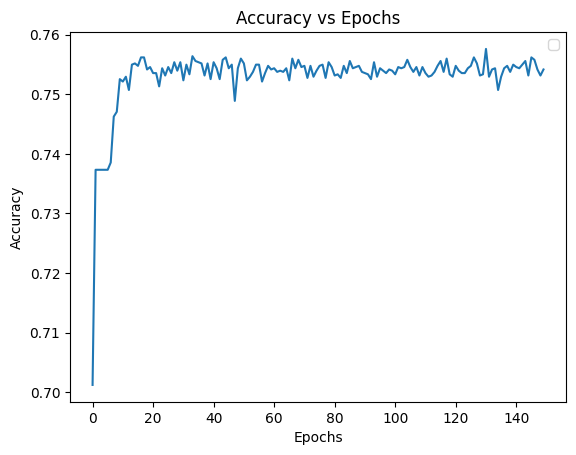

In [22]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

## Model 2

In [23]:
x = df[['tenure']].values
y = df['Churn'].values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test)

In [26]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(12, input_dim=1, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [27]:
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model2.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
141/141 [==============================] - 2s 7ms/step - loss: 0.6303 - accuracy: 0.6989 - val_loss: 0.5526 - val_accuracy: 0.7507
Epoch 2/150
141/141 [==============================] - 1s 6ms/step - loss: 0.5577 - accuracy: 0.7298 - val_loss: 0.5081 - val_accuracy: 0.7507
Epoch 3/150
141/141 [==============================] - 1s 5ms/step - loss: 0.5443 - accuracy: 0.7304 - val_loss: 0.5004 - val_accuracy: 0.7507
Epoch 4/150
141/141 [==============================] - 1s 5ms/step - loss: 0.5387 - accuracy: 0.7304 - val_loss: 0.4988 - val_accuracy: 0.7507
Epoch 5/150
141/141 [==============================] - 1s 5ms/step - loss: 0.5383 - accuracy: 0.7304 - val_loss: 0.4988 - val_accuracy: 0.7507
Epoch 6/150
141/141 [==============================] - 1s 6ms/step - loss: 0.5366 - accuracy: 0.7304 - val_loss: 0.4975 - val_accuracy: 0.7507
Epoch 7/150
141/141 [==============================] - 1s 7ms/step - loss: 0.5322 - accuracy: 0.7304 - val_loss: 0.4973 - val_accuracy: 0.7507

In [29]:
y_pred = model2.predict(X_test)
pred = np.round(y_pred)

45/45 [==============================] - 0s 3ms/step


In [30]:
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1036    0]
 [ 373    0]]


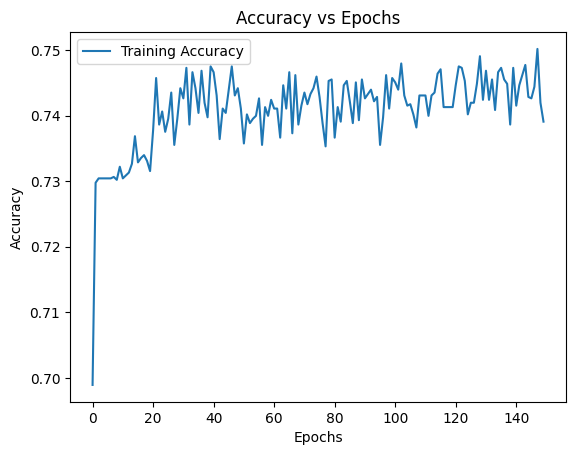

In [31]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

## Model 3

In [32]:
x = df[['tenure', 'MonthlyCharges', 'TotalCharges']].values
y = df['Churn'].values

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [36]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(12, input_dim=3, activation='relu'))
model3.add(tf.keras.layers.Dense(8, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [37]:
model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model3.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
141/141 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.7169 - val_loss: nan - val_accuracy: 0.7507
Epoch 2/150
141/141 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 3/150
141/141 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 4/150
141/141 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 5/150
141/141 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 6/150
141/141 [==============================] - 2s 15ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 7/150
141/141 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 8/150
141/141 [==================

In [39]:
y_pred = model.predict(X_test)
pred = np.round(y_pred)

45/45 [==============================] - 0s 3ms/step


In [40]:
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[929 107]
 [239 134]]


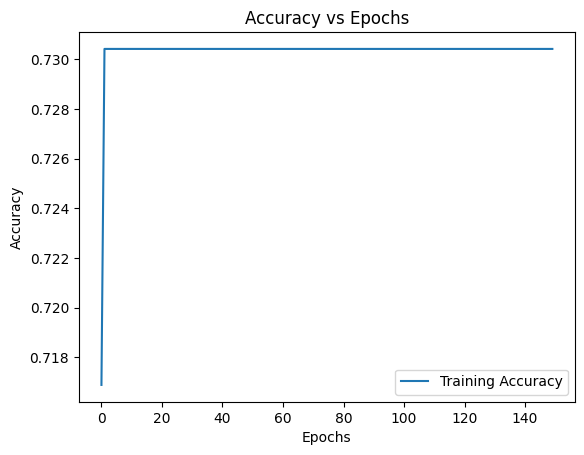

In [41]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()